**Name:** Omitted 

**Student ID:** Omitted

## Assignment 02, Question: 02

In [1]:
### Importing necessary libraries

## As usual libraries-

import numpy as np
import pandas as pd


## Data visualization libraries-

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Regression modelling libraries-

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error as MSE, r2_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn import preprocessing   ## For Preprocessing


### 2. Regression

**In this exercise, you will perform tasks faced by a data scientist working in the
real estate industry. Your job is to build a predictive model to estimate selling price for houses.**

You can find more details about the dataset (Housing.csv), including an explanation of the variables from
https://www.kaggle.com/mssmartypants/paris-housing-price-prediction

**You need to perform the following tasks:-**

+ **Exploratory data analysis: try to understand the different variables in the data. Identify the variables, based on exploratory data analysis methods (similar as in the previous task), that you think have an effect on the price of the house**

In [2]:
## Reading the given 'Housing' csv file

df_housing = pd.read_csv('Housing.csv', sep = ',', header = 0)
df_housing.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [3]:
### Understanding the data, Data Prepearation and EDA

## Following we can have a look from multi dimentional angle to the dataset, 
# such as- numbers of data entries, null values (if any), datatypes.

df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [4]:
## Removing duplicate rows (if any) from the dataset

df_housing = df_housing.drop_duplicates(keep = 'first')
df_housing.shape

(10000, 17)

In [5]:
## Some descriptive statistics-

df_housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
squareMeters,10000.0,4.987013e+04,2.877438e+04,89.0,25098.50,50105.5,74609.75,99999.0
numberOfRooms,10000.0,5.035840e+01,2.881670e+01,1.0,25.00,50.0,75.00,100.0
hasYard,10000.0,5.087000e-01,4.999493e-01,0.0,0.00,1.0,1.00,1.0
hasPool,10000.0,4.968000e-01,5.000148e-01,0.0,0.00,0.0,1.00,1.0
floors,10000.0,5.027630e+01,2.888917e+01,1.0,25.00,50.0,76.00,100.0
cityCode,10000.0,5.022549e+04,2.900668e+04,3.0,24693.75,50693.0,75683.25,99953.0
cityPartRange,10000.0,5.510100e+00,2.872024e+00,1.0,3.00,5.0,8.00,10.0
numPrevOwners,10000.0,5.521700e+00,2.856667e+00,1.0,3.00,5.0,8.00,10.0
made,10000.0,2.005488e+03,9.308090e+00,1990.0,1997.00,2005.5,2014.00,2021.0
isNewBuilt,10000.0,4.991000e-01,5.000242e-01,0.0,0.00,0.0,1.00,1.0


In [6]:
df_housing.nunique() ## Checking unique values

squareMeters          9483
numberOfRooms          100
hasYard                  2
hasPool                  2
floors                 100
cityCode              9509
cityPartRange           10
numPrevOwners           10
made                    32
isNewBuilt               2
hasStormProtector        2
basement              6352
attic                 6267
garage                 901
hasStorageRoom           2
hasGuestRoom            11
price                10000
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014F5EA2F788>,
      dtype=object)

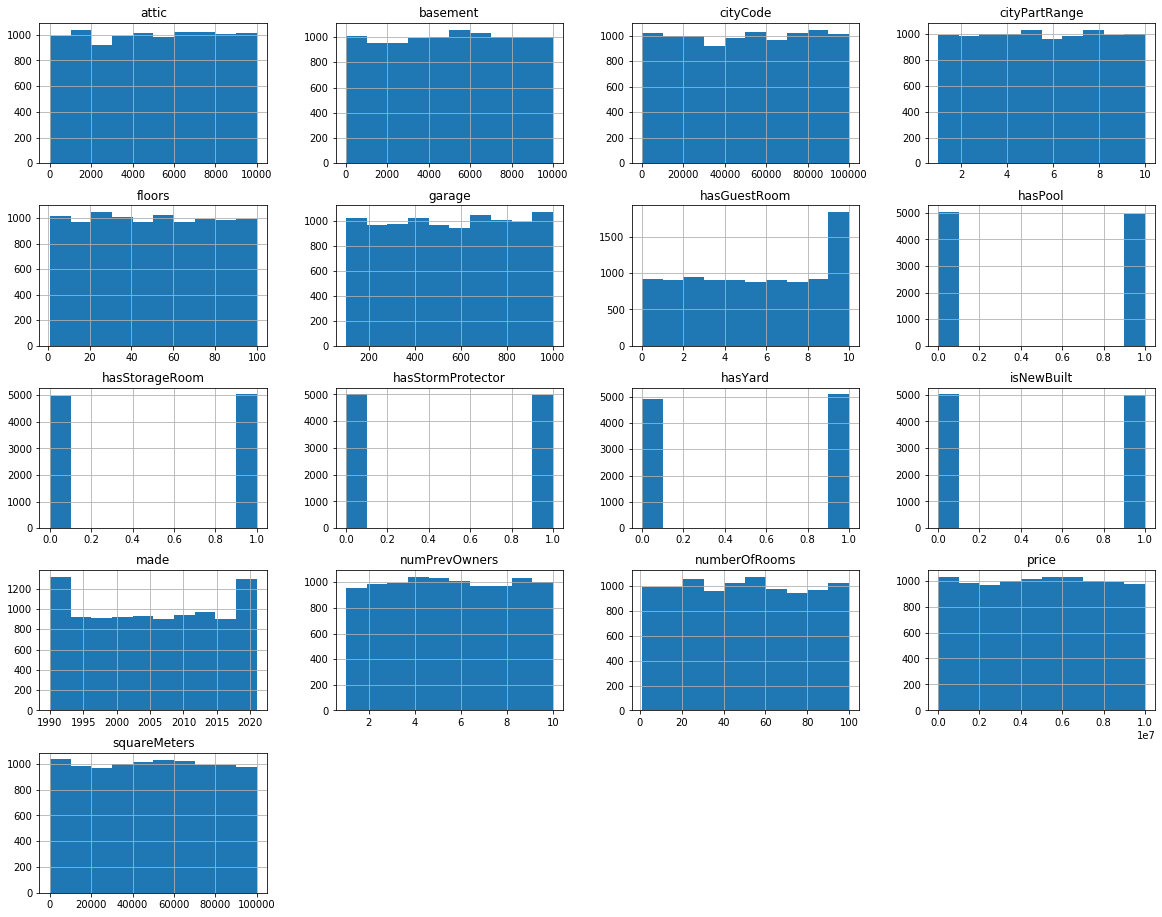

In [7]:
### Now we will see some vizualized form of data analysis

df_housing.hist(figsize=(20, 16))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


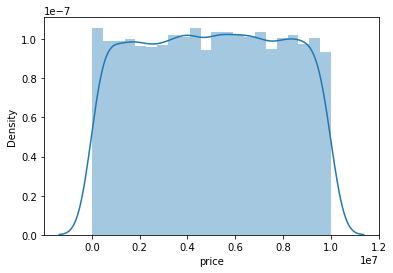

In [8]:
sns.distplot(df_housing['price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


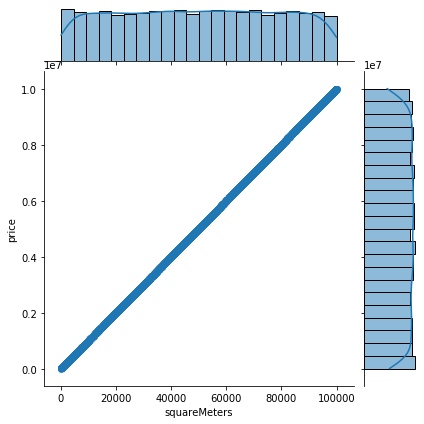

In [9]:
sns.jointplot('squareMeters', 'price', data = df_housing, kind = 'reg')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


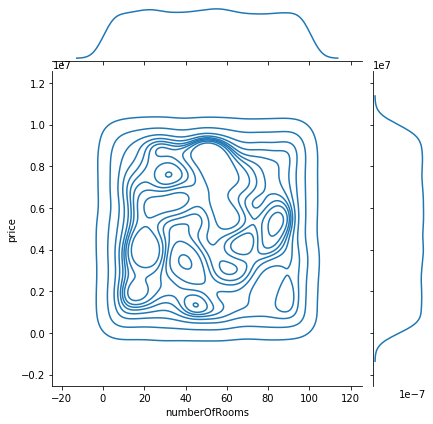

In [10]:
sns.jointplot('numberOfRooms', 'price', data = df_housing, kind = 'kde')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


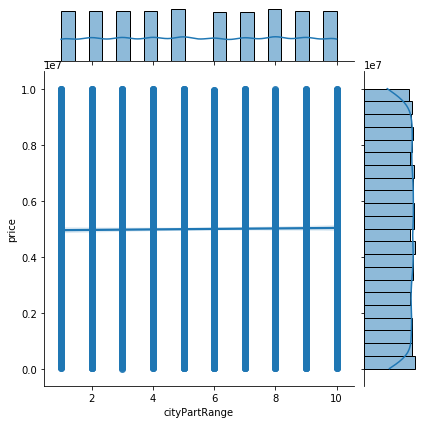

In [11]:
sns.jointplot('cityPartRange', 'price', data = df_housing, kind = 'reg')

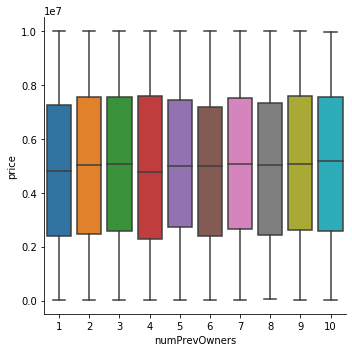

In [12]:
sns.catplot(x = 'numPrevOwners', y = 'price', data = df_housing, kind = 'box')

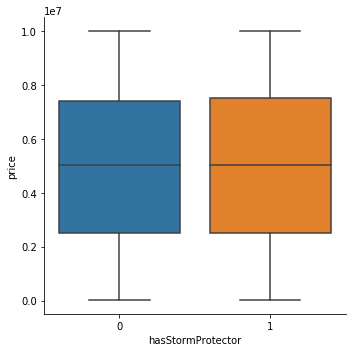

In [13]:
sns.catplot(x = 'hasStormProtector', y = 'price', data = df_housing, kind = 'box')

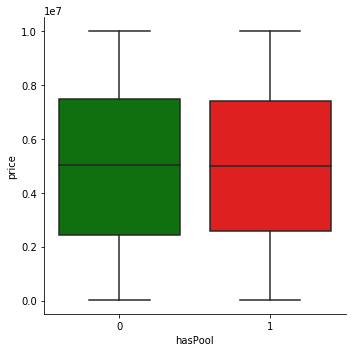

In [14]:
sns.catplot(x = 'hasPool', y = 'price', data = df_housing, palette={0: 'g', 1: 'r'}, kind = 'box')

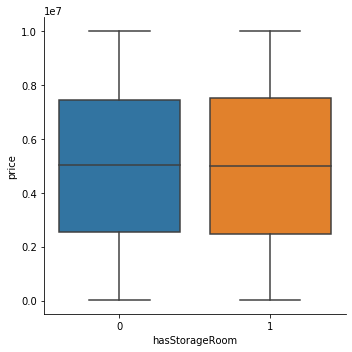

In [15]:
sns.catplot(x = 'hasStorageRoom', y = 'price', data = df_housing, kind = 'box')

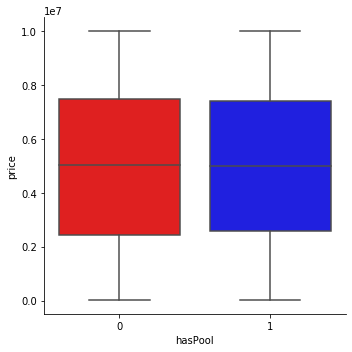

In [16]:
sns.catplot(x = 'hasPool', y = 'price', data = df_housing, palette={0: 'r', 1: 'b'}, kind = 'box')

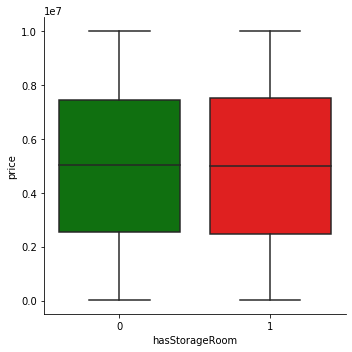

In [17]:
sns.catplot(x = 'hasStorageRoom', y = 'price', data = df_housing, palette={0: 'g', 1: 'r'}, kind = 'box')

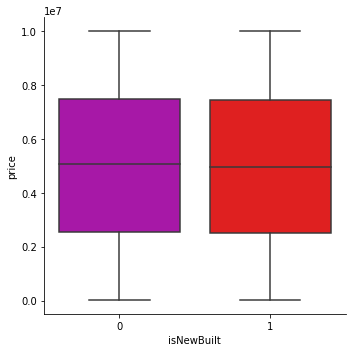

In [18]:
sns.catplot(x = 'isNewBuilt', y = 'price', data = df_housing, palette={0: 'm', 1: 'r'}, kind = 'box')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


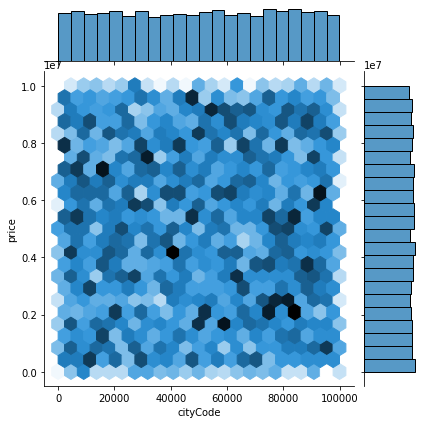

In [19]:
sns.jointplot('cityCode', 'price', data = df_housing, kind = 'hex')

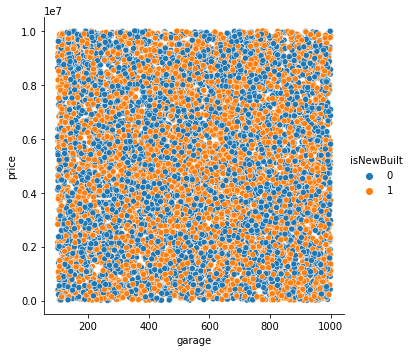

In [20]:
sns.relplot(x = 'garage', y = 'price', hue = 'isNewBuilt', data = df_housing)

In [21]:
### Calculating correlation matrix-

housing_corr = df_housing.corr()
housing_corr

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
squareMeters,1.000000,0.009573,-0.006650,-0.005594,0.001109,-0.001541,0.008758,0.016619,-0.007207,-0.010667,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999
numberOfRooms,0.009573,1.000000,-0.011240,0.017015,0.022244,0.009040,0.008340,0.016766,0.003978,-0.002865,-0.001656,-0.013990,0.012061,0.023188,-0.004760,-0.015529,0.009591
hasYard,-0.006650,-0.011240,1.000000,0.015514,-0.000883,0.006760,0.005023,0.004279,0.002214,-0.008370,-0.007598,-0.008558,-0.003085,-0.004626,-0.009506,-0.007276,-0.006119
hasPool,-0.005594,0.017015,0.015514,1.000000,-0.004006,0.008072,0.014613,-0.006848,0.001894,0.000188,-0.001001,-0.007268,-0.011901,0.004832,0.001238,0.001123,-0.005070
floors,0.001109,0.022244,-0.000883,-0.004006,1.000000,0.002207,-0.004921,0.002463,0.005022,0.002458,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654
cityCode,-0.001541,0.009040,0.006760,0.008072,0.002207,1.000000,0.011334,-0.007549,0.009266,-0.000224,-0.004941,0.002652,-0.002019,-0.002208,0.002554,-0.003338,-0.001539
cityPartRange,0.008758,0.008340,0.005023,0.014613,-0.004921,0.011334,1.000000,0.009238,0.007748,-0.001874,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813
numPrevOwners,0.016619,0.016766,0.004279,-0.006848,0.002463,-0.007549,0.009238,1.000000,0.006858,-0.017420,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619
made,-0.007207,0.003978,0.002214,0.001894,0.005022,0.009266,0.007748,0.006858,1.000000,-0.001678,-0.000645,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210
isNewBuilt,-0.010667,-0.002865,-0.008370,0.000188,0.002458,-0.000224,-0.001874,-0.017420,-0.001678,1.000000,0.003200,-0.015986,0.020127,0.002749,0.007011,0.019895,-0.010643


In [22]:
housing_corr.price.sort_values(ascending = False)  ## Sorting the values of 'price' variable

price                1.000000
squareMeters         0.999999
numPrevOwners        0.016619
numberOfRooms        0.009591
cityPartRange        0.008813
hasStormProtector    0.007496
floors               0.001654
attic               -0.000600
hasGuestRoom        -0.000644
cityCode            -0.001539
hasStorageRoom      -0.003485
basement            -0.003967
hasPool             -0.005070
hasYard             -0.006119
made                -0.007210
isNewBuilt          -0.010643
garage              -0.017229
Name: price, dtype: float64

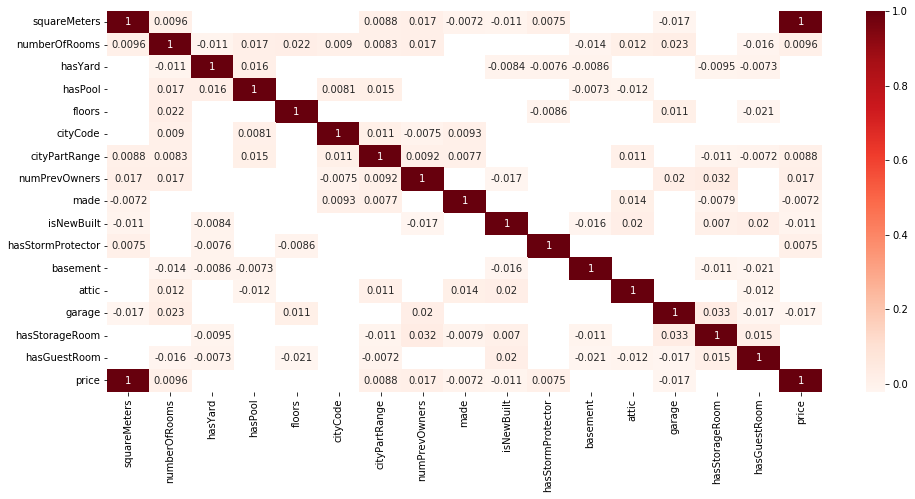

In [23]:
## Plotting correlation: As our target varaible is 'price', we will consider its correlation with other variables.

plt.figure(figsize = (16,7))

sns.heatmap(housing_corr[(housing_corr <= -0.007) | (housing_corr >= 0.007)], annot = True, cmap = 'Reds')

## We assume that, Correlation Coefficient values greater than (- 0.007) or less than (+ 0.007) are not that significant.

## In this heatmap filtering we can see that, some correlations are not visible for the variables in relation to our 
 # target variable.Therefore, we will exclude those variables for our Regression models.

In [24]:
### Dropping variables that seem not significants-

housing = df_housing.drop(['hasYard', 'hasPool', 'floors', 'cityCode', 'basement', 'attic', 'hasStorageRoom',
                           'hasGuestRoom'], axis = 1)
housing.head()

,squareMeters,numberOfRooms,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,garage,price
0,75523,3,3,8,2005,0,1,956,7559081.5
1,80771,39,8,6,2015,1,0,128,8085989.5
2,55712,58,6,8,2021,0,0,135,5574642.1
3,32316,47,10,4,2012,0,1,359,3232561.2
4,70429,19,3,7,1990,1,0,292,7055052.0


- **Develop a decision tree regression model that the company can use to predict the selling price for new houses on the market. Try to optimize the parameters. What is the best MSE that you can achieve?**

In [25]:
# To perform regression with trees, we will need to import DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

In [26]:
### Creating trianing and test sets-

## Separate predictors and target variable 

x = housing.drop(['price'], axis = 1) 
y = housing['price']

## Data Split: Deviding the data into training set (75 %) and test set (25 %) using 'random_state = 0' method

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [27]:
## Checking the shape of splitted items

print(x.shape, y.shape)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(10000, 8) (10000,)
(7500, 8) (2500, 8)
(7500,) (2500,)


In [28]:
### Defining the DecisionTreeRegressor model-

house_reg = DecisionTreeRegressor(random_state = 0)

## Fitting the data or training data-
house_tree_fit = house_reg.fit(x_train, y_train)

In [29]:
from sklearn import tree

In [30]:
### Visualizing the tree
import graphviz

viz_Htree = tree.export_graphviz(house_tree_fit, out_file=None, feature_names=x.columns,)

# Then we can draw the tree

Hgraph = graphviz.Source(viz_Htree) 

# To save it as an external file
## Hgraph.render("viz_Htree") ##

## Hgraph ##

## Warning: This vizualization takes so long ***

In [31]:
# To see how we perform we create prediction and calculate MSE

y_pred = house_tree_fit.predict(x_test)

mse_1 = MSE(y_test, y_pred)

print('MSE of unpruned (without specifying parameters) tree is:', mse_1)

y_pred[:5]

MSE of unpruned (without specifying parameters) tree is: 30339606.166388165


array([1415900.4,  508665.1, 6275591.9, 8769343.7,  193540. ])

In [32]:
### Optimising the parameters

## We will now limit the depth of the tree, and we require to have at least 15 nodes in each branch
house_reg_2 = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 2, random_state = 0)


house_tree_fit_2 = house_reg_2.fit(x_train, y_train)  ## Fitting the data

y_pred_2 = house_tree_fit_2.predict(x_test)

mse_2 = MSE(y_test, y_pred_2)

# We improved a lot. When we have regression, we do not have any spcific error value to target
# We just try to decrease this value as much as we can by chaning parameters

print('MSE of pruned or specified tree is', mse_2)

y_pred_2[:5]

## We can see here that we now have improved our MSE with pruning parameters. But it is important to note that even though
 # prunig is better than not pruning at all, pruning with high parameters often gives worse results.

MSE of pruned or specified tree is 26288134.533973128


array([1410498.14      ,  509080.21666667, 6277338.525     ,
       8767062.82307692,  192700.425     ])

In [33]:
### We will now compare it to a linear regression model-

house_lr = LinearRegression()

house_lr_fit = house_lr.fit(x_train, y_train)

y_pred_3 = house_lr_fit.predict(x_test)

mse_3 = MSE(y_test, y_pred_3)

print('MSE of linear regression is', mse_3)

## We see that this LinearRegression gave us the best MSE so far

MSE of linear regression is 10486003.916149175


In [34]:
### We will try with Gridsearch now-

# Importing Grid search
from sklearn.model_selection import GridSearchCV

In [44]:
## Defining params_dt

params_dt = {'max_depth': list(range(1, 16)),'min_samples_leaf': list(range(1, 5))}

grid_dt = GridSearchCV(estimator= house_reg, param_grid= params_dt, scoring='neg_mean_squared_error', cv= 5)

grid_dt.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validati

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validati

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validati

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'min_samples_leaf': [0, 1, 2, 3, 4]},
          

In [45]:
### Extracting the best model according to the GridSearch-

best_model = grid_dt.best_estimator_

## Evaluating the prediction based on that

y_pred_4 =  best_model.predict(x_test)

mse_4 = MSE(y_test, y_pred_4)

print('MSE of optimized regression tree is', mse_4)

## We can see now it has given us a better MSE compared to the previous pruned one but still worse than the LinearModel.

MSE of optimized regression tree is 24667158.637662463


In [37]:
### We will now try with RandomForest-

## Importing the library-
from sklearn.ensemble import RandomForestRegressor

In [38]:
### Defining the RandomForestRegressor model-

house_rf_1 = RandomForestRegressor(n_estimators = 500, random_state = 0)

## Fitting the data or training data-
house_rf_fit_1 = house_rf_1.fit(x_train, y_train)

In [39]:
### Creating prediction-

y_pred_rf_1 = house_rf_1.predict(x_test)

mse_rf_1 = MSE(y_test, y_pred_rf_1)    ## Evaluation

print('MSE of RandomForestRegressor is:', mse_rf_1)

## We now see, we relatively got a better MSE but still worse than the LinearRegression model.

MSE of RandomForestRegressor is: 16238009.099305524


In [52]:
### Optimizing the RandomForest Regression-

grid = dict(max_depth = [8, 10, 12], min_samples_leaf = [2, 4, 6])

forest_house = RandomForestRegressor(n_estimators= 200, random_state = 0)

grid_search = GridSearchCV(estimator= forest_house, param_grid = grid, scoring = 'neg_mean_squared_error')

grid_result = grid_search.fit(x, y)

print('Best result is obtained using', grid_result.best_params_)

Best result is obtained using {'max_depth': 12, 'min_samples_leaf': 4}


In [53]:
house_rf = RandomForestRegressor(n_estimators= 200, max_depth= 12, min_samples_leaf= 4, random_state= 0)

house_rf_fit = house_rf.fit(x_train, y_train) ## Fitting the training set

y_pred_rf = house_rf_fit.predict(x_test)

mse_rf = MSE(y_test, y_pred_rf)  ## MSE calculation

print('MSE of RandomForestRegressor is:', mse_rf)

## We can see now that we improved a lot in minimizing our MSE.

MSE of RandomForestRegressor is: 14911918.930474328


In [54]:
mse_rf > mse_3, mse_rf_1 > mse_rf

(True, True)

In [ ]:
### Therefore, the best MSE we got with our LinearRegression in this case.

- **Create predictive models of neural network using keras. Experiment with different number of layers (up to 4). What is the best MSE that you can achieve?**

In [55]:
### Importing Keras and other necessary libraries

import keras
from keras.layers import Dense
from keras.models import Sequential

In [56]:
### We will first create the NeuralNetwork model by initializing it-

house_model = Sequential()  ## Specifying for a sequence of layers

## Adding the 1st layer-
 # We specify 60 nodes, relu activation function, and in this case we also specify the number of nodes in the previous layer
 # or in the input layer which is actually the number of columns.
house_model.add(Dense(60, activation= 'relu', input_shape= (len(x.columns),)))

## Adding the 2nd layer-
 # We specify 40 nodes with relu activation function only. And in this case, we don't need to specify the input nodes, as we
 # have already specified the 1st hidden layer will have 60 nodes earlier.

house_model.add(Dense(40, activation= 'relu'))

## Adding the 3rd layer-
 # We specify 25 nodes with relu activation function only.

house_model.add(Dense(25, activation= 'relu'))

## Adding the 3rd layer-
 # We specify 10 nodes with relu activation function only.

house_model.add(Dense(10, activation= 'relu'))

## Adding the 4th layer-
 # We specify 1 node only which will be our output layer.

house_model.add(Dense(1))

In [57]:
### Defining the loss function as the mean squared error-

house_model.compile(optimizer='adam', loss='mean_squared_error')

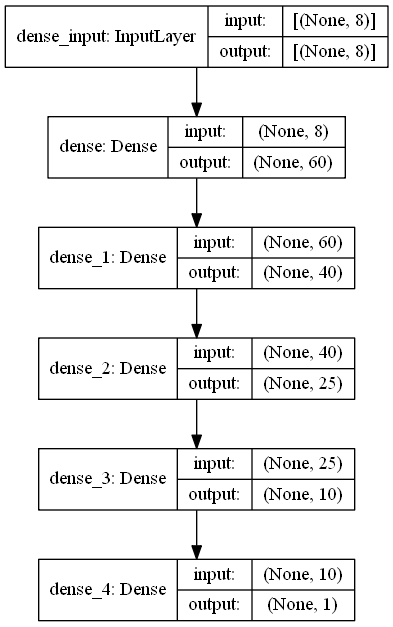

In [58]:
### Vizualising the structure of the model-
  # Most of the time we would not really want a mode detailed picture, as looking at 
  # 12+60+40+25+1 nodes connected, every possible combination between subsequent layers does not really show anything useful

from keras.utils.vis_utils import plot_model

plot_model(house_model, show_shapes=True, show_layer_names=True)
                        ## By adding to_file='model_plot.png', we can save it as an external file

In [59]:
### Once we have created the neural network structure, we can fit the data
# Unfortunately it is very difficult to disable every random component that is part of running keras.# But to have reasonably 
# good idea of model performance, we can increase the number of epoch (essentially iteration) that we run

## If we use 100 in this case, we will get somewhat similar values in the end
## With 'verbose=0', we avoid any messages during model building 

model_1 = house_model.fit(x, y, shuffle=False, epochs = 100, verbose=0)
print(model_1.history['loss'])

[12313497174016.0, 1129599360.0, 12529174.0, 12022241.0, 12127225.0, 11751341.0, 11936834.0, 12046669.0, 12021899.0, 12002188.0, 12054435.0, 12151163.0, 12190568.0, 12206257.0, 12246878.0, 12518749.0, 12730037.0, 12956437.0, 13243549.0, 13651471.0, 14253552.0, 14463345.0, 16153903.0, 14241110.0, 27872710.0, 20140074.0, 21325020.0, 23892530.0, 19828314.0, 25995758.0, 30053308.0, 31545806.0, 31598078.0, 30026764.0, 31567764.0, 30796330.0, 31283082.0, 30886252.0, 31227982.0, 31100410.0, 31014584.0, 31059774.0, 30900204.0, 31117496.0, 30899500.0, 31022488.0, 30897684.0, 30966898.0, 30897790.0, 30902756.0, 30883398.0, 30612278.0, 31089370.0, 30599630.0, 30882666.0, 30843608.0, 30722582.0, 30720688.0, 30747296.0, 30615076.0, 30828004.0, 30721006.0, 30235296.0, 31038816.0, 30467542.0, 30366076.0, 30854906.0, 30291320.0, 30789852.0, 30378678.0, 30474354.0, 30587470.0, 30195690.0, 30914252.0, 30067462.0, 30544920.0, 30507912.0, 30307782.0, 30294628.0, 30526794.0, 30192586.0, 30442944.0, 3017139

In [60]:
model_1.history['loss'].sort()

print("Smallest MSE is:", model_1.history['loss'][:1])

Smallest MSE is: [11751341.0]


In [ ]:
### Therfore, this is a better MSE we achieved using keras but still worse than our LinearRegression Model.